In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Final EDA

## Load Datasets

In [26]:
#read csv files
df_ba = pd.read_csv('sales_data.csv')
df_lz = pd.read_csv('laz_data.csv').rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'}).set_index('index')
df_sp = pd.read_csv('shopee_data.csv').rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'}).set_index('index')
df_sp = df_sp.drop(columns=['Unnamed: 0.1', 'month'])
df_fb = pd.read_csv('fb_data.csv').rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'}).set_index('index')

In [28]:
#parse dates
df_ba['date'] = pd.to_datetime(df_ba['date'], format='%Y-%m-%d')
df_lz['date'] = pd.to_datetime(df_lz['date'], format='%Y-%m-%d')
df_sp['date'] = pd.to_datetime(df_sp['date'], format='%Y-%m-%d')
df_fb['date'] = pd.to_datetime(df_fb['date'], format='%Y-%m-%d')

In [69]:
df_ba['brand'] = df_ba.brand.replace({'Enfagrow': 'Enfa', 'Enfamama': 'Enfa', 
                         'Enfamil': 'Enfa', 'Sustagen Premium': 'Sustagen'})

In [68]:
df_lz.brand_name.unique()

array(['Enfagrow', 'Enfagrow,Lactum', 'Durex,Enfagrow,Lactum', 'Lactum',
       'Sustagen Premium',
       'Durex,Enfagrow,Gaviscon,Lactum,Strepsils,Sustagen Premium,Veet'],
      dtype=object)

In [67]:
df_lz

,date,campaign_id,campaign_name,funding_type,brand_id,brand_name,seller_id,seller_name,channel,site,...,visits,unique_visitors,pdp_pv,a2c_pv,item_sold,total_orders,revenue_usd,cr,avg_rev_per_visit,avg_val_per_item
index,,,,,,,,,,,,,,,,,,,,,
0,2019-01-03,11030000011029,TAP 12.12,Partnership Assisted,207,Enfagrow,100065226,Lazada E-Services Philippines,Local Publishers,Default,...,4,NaN,0,0,0,NaN,0.0,0.0,0.0,0.0
1,2019-01-05,11030000011029,TAP 12.12,Partnership Assisted,207,Enfagrow,100065226,Lazada E-Services Philippines,Local Publishers,Default,...,2,NaN,0,0,0,NaN,0.0,0.0,0.0,0.0
2,2019-01-02,11030000011029,TAP 12.12,Partnership Assisted,207,Enfagrow,100065226,Lazada E-Services Philippines,Local Publishers,Default,...,2,NaN,0,0,0,NaN,0.0,0.0,0.0,0.0
3,2019-01-10,11030000011029,TAP 12.12,Partnership Assisted,207,Enfagrow,100065226,Lazada E-Services Philippines,Local Publishers,Default,...,1,NaN,0,0,0,NaN,0.0,0.0,0.0,0.0
4,2019-01-02,11030000011029,TAP 12.12,Partnership Assisted,207,Enfagrow,100065226,Lazada E-Services Philippines,Local Publishers,Default,...,2,NaN,0,0,0,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57674,2020-12-09,11030000676461,Facebook Organic Posts,Partnership Assisted,"202,207,234,34445,478,55125,65761","Durex,Enfagrow,Gaviscon,Lactum,Strepsils,Susta...","100065226,26629","Global Wellness Inc.,Lazada E-Services Philipp...",Ad Networks,Network,...,5,5.0,0,0,0,0.0,0.0,0.0,0.0,0.0
57675,2020-12-20,11030000676461,Facebook Organic Posts,Partnership Assisted,"202,207,234,34445,478,55125,65761","Durex,Enfagrow,Gaviscon,Lactum,Strepsils,Susta...","100065226,26629","Global Wellness Inc.,Lazada E-Services Philipp...",Ad Networks,Network,...,1,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0
57676,2020-12-07,11030000676461,Facebook Organic Posts,Partnership Assisted,"202,207,234,34445,478,55125,65761","Durex,Enfagrow,Gaviscon,Lactum,Strepsils,Susta...","100065226,26629","Global Wellness Inc.,Lazada E-Services Philipp...",Ad Networks,Network,...,1,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0


## Sales

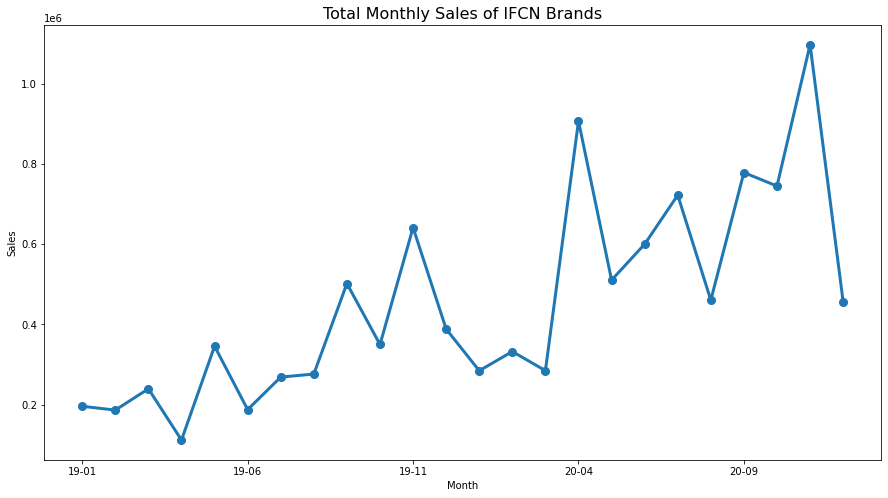

In [54]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['sales'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Total Monthly Sales of IFCN Brands', fontsize=16);

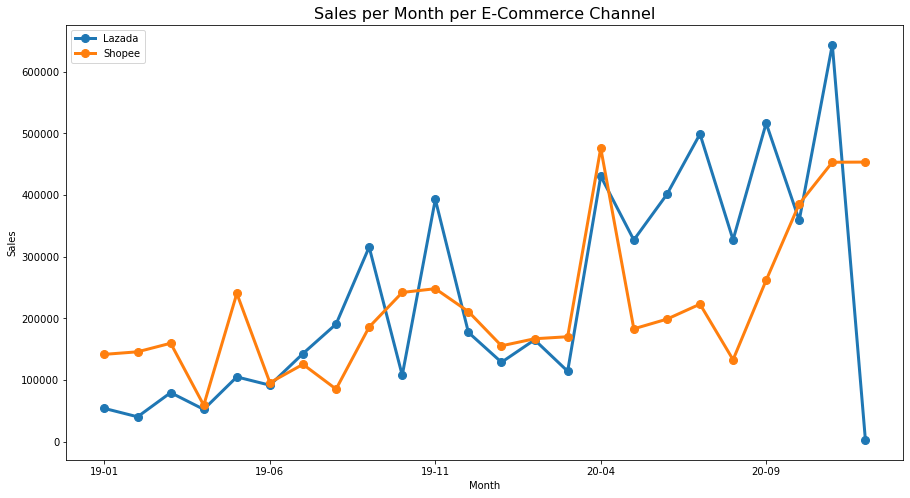

In [76]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Sales per Month per E-Commerce Channel', fontsize=16);

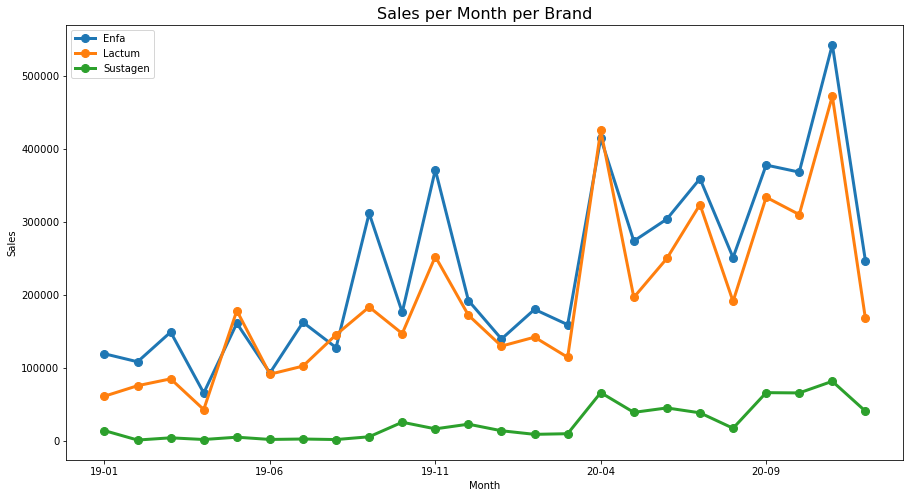

In [73]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Sales per Month per Brand', fontsize=16);

## Product Views

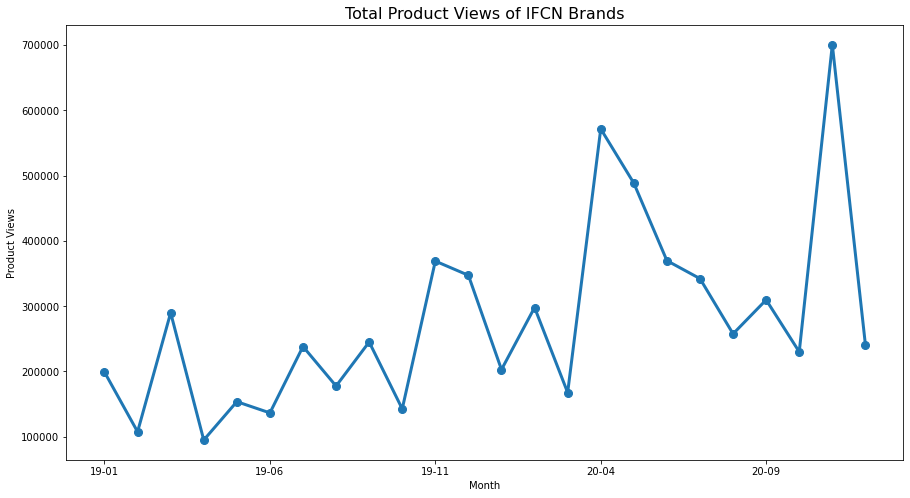

In [53]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['product_views'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title('Total Product Views of IFCN Brands', fontsize=16);

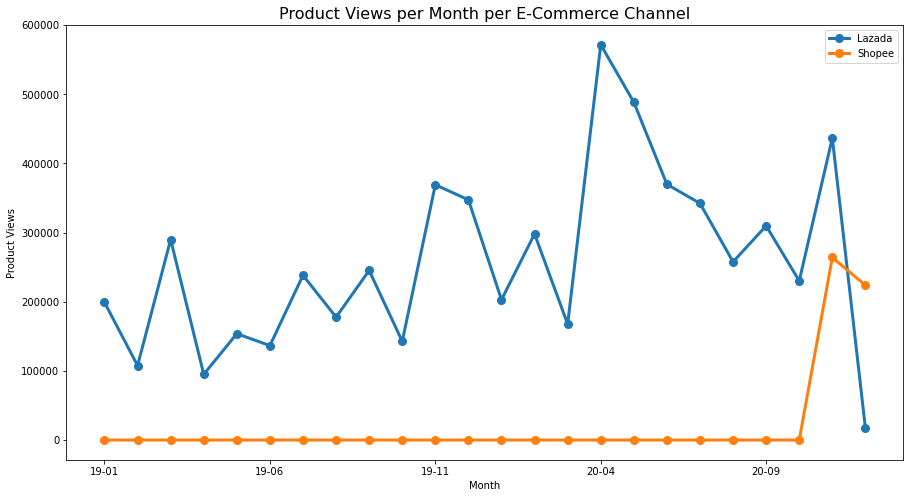

In [86]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='product_views', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title('Product Views per Month per E-Commerce Channel', fontsize=16);

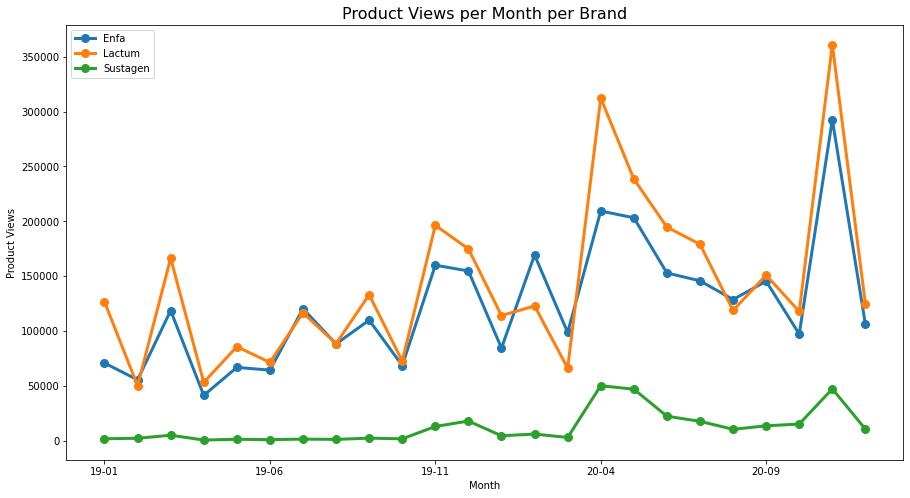

In [96]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='product_views', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title('Product Views per Month per Brand', fontsize=16);

In [97]:
d

brand,Enfa,Lactum,Sustagen
date,,,
19-01,70754,126610,1760
19-02,55473,49985,2195
19-03,118602,166371,4967
19-04,41298,53100,597
19-05,66799,85698,1277
19-06,64299,71326,947
19-07,120306,116537,1429
19-08,88156,88398,1179
19-09,109860,133024,2329


In [103]:
d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d1

date
19-01     54119.58
19-02     11172.81
19-03     61202.13
19-04     12285.60
19-05     35374.64
19-06     34639.96
19-07     71564.81
19-08     57106.64
19-09     55568.64
19-10     33824.84
19-11    169933.83
19-12    152029.69
20-01     43831.06
20-02     80460.00
20-03     13403.25
20-04     86961.06
20-05     68952.52
20-06    103917.09
20-07     59629.50
20-08      4425.55
20-09      3819.75
20-10     65346.58
20-11     99812.39
20-12    100621.72
Name: revenue_usd, dtype: float64

In [104]:
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d2

date
20-01    18834.58
20-02    27804.58
20-03    20551.01
20-04    76576.08
20-05    13575.58
20-06    27866.53
20-07    17409.23
20-08      764.01
20-09     3081.43
20-10    57883.69
20-11    59325.99
20-12    46646.35
Name: gmv_usd, dtype: float64

In [108]:
d1.to_frame().join(d2, on='date')

,revenue_usd,gmv_usd
date,,
19-01,54119.58,NaN
19-02,11172.81,NaN
19-03,61202.13,NaN
19-04,12285.60,NaN
19-05,35374.64,NaN
19-06,34639.96,NaN
19-07,71564.81,NaN
19-08,57106.64,NaN
19-09,55568.64,NaN


## Campaigns

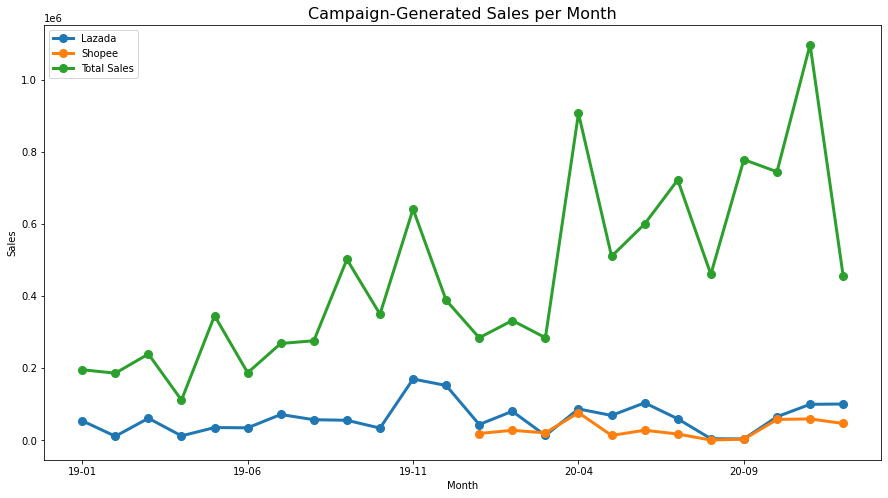

In [111]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d3 = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['sales'].sum()
d = d1.to_frame().join(d2, on='date').join(d3, on='date')
d = d.rename(columns={'revenue_usd':'Lazada', 'gmv_usd':'Shopee', 'sales':'Total Sales'})

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
d['Total Sales'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Total Sales')
# ax.get_legend().remove()
# ax.get_xaxis().set_visible(False)
ax.legend()
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Campaign-Generated Sales per Month', fontsize=16);